### CSCI 636: Pattern Recognition & Data Mining I
#### Project: Categorization of Clinical Trials using Machine Learning and Natural Language Processing
#### Team Name: Outliers
#### Team Members: Michael Welford (Z-1679714) and A S M Shahadat Hossain (Z-1907296)

# Project Preprocessing

In [1]:
# Import required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def add_features(column_name, data_frame):
    """Creates binary features from the passed column in a passed DataFrame
       Params: column_name - the name of the column with the values 
                             to be made into features
                data_frame - the DataFrame the features will be added to."""
    
    # Initalize the categories list.
    categories = []
    
    # Extract the new feature names.
    for category_string in data_frame[column_name]:
        for category in category_string.split(';'):
            categories.append(category.rstrip().lstrip())
     
    # Create the new features using the apply method.
    for i in sorted(list(set(categories))):
        print(i)
        
        data_frame[i] = data_frame[column_name].apply(lambda x: i in x)

In [3]:
def add_num_sponsors(column_name, data_frame):
    """Adds a new feature containing the number of sponsors a clinical trial has.
       Params: column_name - the name of the column with the Sponsors list
               data_frame - the DataFrame the new feature will be added to."""
    
    # Split the Sponsors string for each trial and determine the length of the
    # corresponding list.
    data_frame['Number of Sponsors'] = data_frame[column_name].str.split(';').apply(len)

## Process the Dimensions Dataset:

In [4]:
# Read the Dimensions dataset and show the titles.
dimensions_data = pd.read_csv("Dimensions-Clinical-Trial.csv")
dimensions_data.columns = dimensions_data.iloc[0]
dimensions_data = dimensions_data[1:]
dimensions_data['Title']

C:\Users\thewe\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,4,5,10,44,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


1        Positive Airway Pressure for the Treatment of ...
2        Understanding and Developing a Network-based S...
3        An Internet-Delivered Mind-Body Program for Re...
4        A Phase 1/2 Study of MPH966, an Oral Neutrophi...
5        Vertebrobasilar Flow Evaluation and Risk of Tr...
                               ...                        
32724    A three arm, prospective study to compare the ...
32725    A cross-sectional study of HIV-related Neurolo...
32726    A prospective non-randomised dual arm longitud...
32727    Randomised controlled trial of five treatments...
32728    A randomised control trial to evaluate the eff...
Name: Title, Length: 32728, dtype: object

In [5]:
# Determine which columns contain missing values.
dimensions_data.isna().sum()

0
Rank                                   0
Trial ID                               0
Title                                  0
Abstract                               4
Start Year                          1457
Completion Year                     5033
Phase                              14535
Conditions                            13
Gender                                 0
Registry                               0
Investigators/Contacts             32728
Sponsors/Collaborators                 0
GRID IDs                             475
City of Sponsor/Collaborator         433
State of Sponsor/Collaborator        871
Country of Sponsor/Collaborator        0
Collaborating Funders                  0
Funder Group                           0
Funder Country                         0
Source Linkout                         0
Dimensions URL                         0
FOR (ANZSRC) Categories              461
FOR 1                                461
FOR 2                                461
FOR 3         

In [6]:
# Determine the data types of each column.
dimensions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32728 entries, 1 to 32728
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Rank                             32728 non-null  object
 1   Trial ID                         32728 non-null  object
 2   Title                            32728 non-null  object
 3   Abstract                         32724 non-null  object
 4   Start Year                       31271 non-null  object
 5   Completion Year                  27695 non-null  object
 6   Phase                            18193 non-null  object
 7   Conditions                       32715 non-null  object
 8   Gender                           32728 non-null  object
 9   Registry                         32728 non-null  object
 10  Investigators/Contacts           0 non-null      object
 11  Sponsors/Collaborators           32728 non-null  object
 12  GRID IDs                        

In [7]:
# Make a list containing the features that have values.
dimensions_features = ['Rank', 'Trial ID', 'Title', 'Abstract', 'Start Year', 'Completion Year',
                      'Phase', 'Conditions', 'Gender', 'Sponsors/Collaborators', 'City of Sponsor/Collaborator',
                      'State of Sponsor/Collaborator', 'Collaborating Funders', 'FOR (ANZSRC) Categories','RCDC Categories','HRCS HC Categories','HRCS RAC Categories','ICRP Cancer Types', 'ICRP CSO Categories']

In [8]:
# Subset the Dimensions data with the above features.
dimensions_data_sub = dimensions_data[dimensions_features]
dimensions_data_sub

,Rank,Trial ID,Title,Abstract,Start Year,Completion Year,Phase,Conditions,Gender,Sponsors/Collaborators,City of Sponsor/Collaborator,State of Sponsor/Collaborator,Collaborating Funders,FOR (ANZSRC) Categories,RCDC Categories,HRCS HC Categories,HRCS RAC Categories,ICRP Cancer Types,ICRP CSO Categories
1,100,NCT04132999,Positive Airway Pressure for the Treatment of ...,Determine the efficacy of family-informed inte...,2021,2024,NaN,Obstructive Sleep Apnea; Down Syndrome,All,Children's Hospital of Philadelphia; National ...,Philadelphia; Bethesda; Bethesda; Cincinnati; ...,Pennsylvania; Maryland; Maryland; Ohio; Pennsy...,Children's Hospital of Philadelphia; National ...,1102 Cardiorespiratory Medicine and Haematolog...,Clinical Trials and Supportive Activities; Lun...,NaN,7.1 Individual care needs,NaN,NaN
2,100,NCT04077047,Understanding and Developing a Network-based S...,HIV/AIDS is the second leading cause of death ...,2021,2023,NaN,HIV/AIDS,All,Duke University; National Institute of Mental ...,Durham; Bethesda,North Carolina; Maryland,National Institute of Mental Health,1117 Public Health and Health Services; 11 Med...,Prevention; Clinical Research; Behavioral and ...,Infection,NaN,NaN,NaN
3,100,NCT04018625,An Internet-Delivered Mind-Body Program for Re...,The present trial will evaluate the feasibilit...,2021,2023,NaN,Pregnancy Related; Perinatal Depression; Anxie...,Female,Stony Brook University; Massachusetts General ...,Stony Brook; Boston; Bethesda,New York; Massachusetts; Maryland,Massachusetts General Hospital; National Insti...,11 Medical and Health Sciences; 1117 Public He...,Clinical Trials and Supportive Activities; Beh...,Mental Health; Reproductive Health and Childbirth,6.6 Psychological and behavioural,NaN,NaN
4,100,NCT03986086,"A Phase 1/2 Study of MPH966, an Oral Neutrophi...",The purpose of this study is evaluate the safe...,2021,2023,Phase 1/2,Hematologic Malignancy,All,Nelson Chao; Mereo BioPharma; National Center ...,Nelson; ; Rockville,; ; Maryland,National Center for Advancing Translational Sc...,1102 Cardiorespiratory Medicine and Haematolog...,Prevention; Clinical Trials and Supportive Act...,Inflammatory and Immune System,6.1 Pharmaceuticals; 6.2 Cellular and gene the...,Leukemia / Leukaemia; Non-Hodgkin's Lymphoma; ...,5.4 Systemic Therapies - Clinical Applications
5,100,NCT03729817,Vertebrobasilar Flow Evaluation and Risk of Tr...,Recent prospective observational data has esta...,2021,2028,NaN,Cerebral Arterial Diseases; Stroke; Vertebroba...,All,University of Illinois at Chicago; National In...,Chicago; Bethesda,Illinois; Maryland,National Institute of Neurological Disorders a...,1102 Cardiorespiratory Medicine and Haematolog...,Stroke; Neurosciences; Brain Disorders; Clinic...,Cardiovascular,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32724,100,ACTRN12605000661673,"A three arm, prospective study to compare the ...",A randomised study of the effect of treatment ...,NaN,NaN,Phase 4,HIV \nLipid metabolismGlucose metabolismMetabo...,All,UNSW Sydney; Garvan Institute of Medical Resea...,Sydney; Darlinghurst; Rockville; Bethesda; Dar...,New South Wales; New South Wales; Maryland; Ma...,National Cancer Institute; National Heart Lung...,11 Medical and Health Sciences; 1103 Clinical ...,Infectious Diseases; HIV/AIDS; Clinical Research,Infection,6.1 Pharmaceuticals,NaN,NaN
32725,100,ACTRN12605000493640,A cross-sectional study of HIV-related Neurolo...,NaN,NaN,NaN,NaN,HIV HIV-related neurological diseases,All,National Institute of Mental Health and Nation...,Bethesda; Bethesda; Bethesda,; Maryland; Maryland,National Institute of Mental Health; National ...,NaN,NaN,NaN,NaN,NaN,NaN
32726,100,ACTRN12605000435684,A prospective non-randomised dual arm longitud...,A prospective non-randomised dual arm longitud...,NaN,NaN,NaN,Acute Hepatitis C,All,UNSW Sydney; Roche Products Pty Ltd; National ...,Sydney; ; Rockville,New South Wales; ; Maryland,National Cancer Institut

In [61]:
# Determine the possible values for the phase attribute.
set(dimensions_data_sub['Phase'])

{'Phase 1',
 'Phase 1/2',
 'Phase 2',
 'Phase 2/3',
 'Phase 3',
 'Phase 4',
 'Post Marketing Surveillance',
 nan}

In [10]:
# Define a function that takes the value from the phase column and returns the corresponding
# integer value of the phase. For the trails with 2 phases, the higher value is used.
def get_phase_number(s):
    if type(s) == float:
        return 0
    elif s == 'Phase 1':
        return 1
    elif s == 'Phase 2' or s == 'Phase 1/2':
        return 2
    elif s == 'Phase 3' or s == 'Phase 2/3':
        return 3
    elif s == 'Phase 4':
        return 4
    elif s == 'Post Marketing Surveillance':
        return 5
    

In [11]:
# Apply the get_phase_number() method to the Phase column in order to create the Numeric Phase feature.
dimensions_data_sub['Numeric Phase'] = dimensions_data_sub['Phase'].apply(get_phase_number)
dimensions_data_sub['Numeric Phase']

C:\Users\thewe\AppData\Local\Temp/ipykernel_19644/2209703656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dimensions_data_sub['Numeric Phase'] = dimensions_data_sub['Phase'].apply(get_phase_number)


1        0
2        0
3        0
4        2
5        0
        ..
32724    4
32725    0
32726    0
32727    2
32728    0
Name: Numeric Phase, Length: 32728, dtype: int64

In [12]:
# Define a function that takes the value from the Phase column 
# and returns the number of phases in the trial.
def get_num_phases(s):
    if type(s) == float:
        return 0
    elif '/' in s:
        return 2
    else:
        return 1

In [13]:
# Apply the get_num_phases() method to the Phase 
# feature in order to make the 'Number of Phases' feature.
dimensions_data_sub['Number of Phases'] = dimensions_data_sub['Phase'].apply(get_num_phases)

C:\Users\thewe\AppData\Local\Temp/ipykernel_19644/3512375624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dimensions_data_sub['Number of Phases'] = dimensions_data_sub['Phase'].apply(get_num_phases)


## Process the Altmetric Clinical Trials dataset:

In [14]:
# Read and preview the Altmetric Clinical Trials dataset.
clinical_trial_data = pd.read_csv("AltmetricClinicalTrials.csv", encoding='latin1')
clinical_trial_data.head()

,Altmetric Attention Score,Title,Journal/Collection Title,Journal ISSNs,Authors at my Institution,Departments,Output Type,OA Status,Subjects (FoR),Affiliations (GRID),...,Reddit mentions,Pinterest mentions,F1000 mentions,Q&A mentions,Video mentions,Syllabi mentions,Number of Mendeley readers,Number of Dimensions citations,Details Page URL,Badge URL
0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,NaN,NaN,NaN,NaN,Clinical trial study record,False,NaN,NaN,...,0,0,0,0,0,0,0,0,https://www.altmetric.com/details/10934380,https://api.altmetric.com/v1/donut/10934380_24...
1,794,Young Donor Plasma Transfusion and Age-Related...,NaN,NaN,NaN,NaN,Clinical trial study record,False,NaN,NaN,...,0,0,0,0,3,0,0,0,https://www.altmetric.com/details/8939909,https://api.altmetric.com/v1/donut/8939909_240...
2,742,NY-ESO-1-redirected CRISPR (TCRendo and PD1) E...,NaN,NaN,NaN,NaN,Clinical trial study record,False,NaN,NaN,...,0,0,0,0,2,0,0,0,https://www.altmetric.com/details/32923924,https://api.altmetric.com/v1/donut/32923924_24...
3,731,A Study of the ReCor Medical Paradise System i...,NaN,NaN,NaN,NaN,Clinical trial study record,False,NaN,NaN,...,0,0,0,0,0,0,0,0,https://www.altmetric.com/details/5911673,https://api.altmetric.com/v1/donut/5911673_240...
4,713,Efficacy and Safety Study of Cenicriviroc for ...,NaN,NaN,NaN,NaN,Clinical trial study record,False,NaN,NaN,...,0,0,0,0,0,0,0,0,https://www.altmetric.com/details/4683880,https://api.altmetric.com/v1/donut/4683880_240...


In [15]:
# Print the data types of the features in the Altmetric dataset.
clinical_trial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50330 entries, 0 to 50329
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Altmetric Attention Score       50330 non-null  int64  
 1   Title                           50330 non-null  object 
 2   Journal/Collection Title        1331 non-null   object 
 3   Journal ISSNs                   0 non-null      float64
 4   Authors at my Institution       0 non-null      float64
 5   Departments                     0 non-null      float64
 6   Output Type                     50330 non-null  object 
 7   OA Status                       50330 non-null  bool   
 8   Subjects (FoR)                  0 non-null      float64
 9   Affiliations (GRID)             0 non-null      float64
 10  Funder                          0 non-null      float64
 11  Publication Date                50329 non-null  object 
 12  DOI                             

In [16]:
# Print the description of the data.
print(clinical_trial_data.describe())

       Altmetric Attention Score  Journal ISSNs  Authors at my Institution  \
count               50330.000000            0.0                        0.0   
mean                   10.044943            NaN                        NaN   
std                    46.627925            NaN                        NaN   
min                     0.000000            NaN                        NaN   
25%                     1.000000            NaN                        NaN   
50%                     1.000000            NaN                        NaN   
75%                     5.000000            NaN                        NaN   
max                  1062.000000            NaN                        NaN   

       Departments  Subjects (FoR)  Affiliations (GRID)  Funder  DOI  ISBN  \
count          0.0             0.0                  0.0     0.0  0.0   0.0   
mean           NaN             NaN                  NaN     NaN  NaN   NaN   
std            NaN             NaN                  NaN     NaN

In [17]:
# Determine which features are completely empty.
clinical_trial_data.isna().sum()

Altmetric Attention Score             0
Title                                 0
Journal/Collection Title          48999
Journal ISSNs                     50330
Authors at my Institution         50330
Departments                       50330
Output Type                           0
OA Status                             0
Subjects (FoR)                    50330
Affiliations (GRID)               50330
Funder                            50330
Publication Date                      1
DOI                               50330
ISBN                              50330
National Clinical Trial ID            0
URI                               50330
PubMed ID                         50330
PubMedCentral ID                  50330
Handle.net IDs                    50330
ADS Bibcode                       50330
arXiv ID                          50330
RePEc ID                          50330
SSRN                              50330
URN                               50330
News mentions                         0


In [18]:
# Define the list of features to subset the Altmetric dataset. 
clinical_trial_data_features = ['Altmetric Attention Score', 'Title', 'Publication Date', 'National Clinical Trial ID',
                               'News mentions', 'Blog mentions', 'Policy mentions', 'Patent mentions', 'Twitter mentions',
                               'Peer review mentions', 'Weibo mentions', 'Facebook mentions', 'Wikipedia mentions', 'Google+ mentions', 'LinkedIn mentions', 
                                'Reddit mentions', 'Pinterest mentions', 'F1000 mentions',
                               'Q&A mentions', 'Video mentions', 'Syllabi mentions', 'Number of Mendeley readers', 'Number of Dimensions citations']

In [19]:
# Subset the Altmetric dataset and print the description of the data.
clinical_trial_data_sub = clinical_trial_data[clinical_trial_data_features]

In [20]:
clinical_trial_data_sub.describe()

,Altmetric Attention Score,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,Weibo mentions,Facebook mentions,Wikipedia mentions,Google+ mentions,LinkedIn mentions,Reddit mentions,Pinterest mentions,F1000 mentions,Q&A mentions,Video mentions,Syllabi mentions,Number of Mendeley readers,Number of Dimensions citations
count,50330.000000,50330.000000,50330.000000,50330.000000,50330.000000,50330.000000,50330.0,50330.000000,50330.000000,50330.000000,50330.000000,50330.0,50330.0,50330.0,50330.0,50330.000000,50330.000000,50330.0,50330.0,50330.0
mean,10.044943,1.661971,0.102503,0.036797,0.091794,2.445162,0.0,0.002901,0.243294,0.016630,0.114544,0.0,0.0,0.0,0.0,0.000417,0.004947,0.0,0.0,0.0
std,46.627925,15.521758,0.469122,0.213674,1.476366,7.929054,0.0,0.121713,1.927009,0.146018,0.684144,0.0,0.0,0.0,0.0,0.024001,0.090452,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
max,1062.000000,1098.000000,17.000000,9.000000,129.000000,468.000000,0.0,16.000000,245.000000,6.000000,65.000000,0.0,0.0,0.0,0.0,2.000000,8.000000,0.0,0.0,0.0


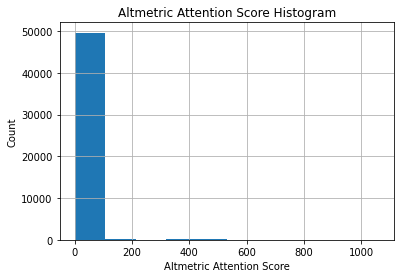

In [60]:
# Show a histogram of the Altmetric Attention Score.
clinical_trial_data_sub['Altmetric Attention Score'].hist()
plt.title('Altmetric Attention Score Histogram')
plt.xlabel('Altmetric Attention Score')
plt.ylabel('Count')
plt.savefig('aas_histogram.png')
plt.show()

<AxesSubplot:>

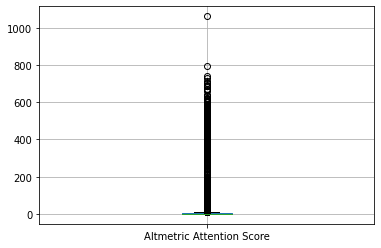

In [22]:
# Print a boxplot of the Altmetric Attention Score.
clinical_trial_data_sub[['Altmetric Attention Score']].boxplot()

In [23]:
# Create a new class label for the Altmetric Attention Score. 
score_75 = 7
clinical_trial_data_sub['AAS Two Class'] = clinical_trial_data_sub['Altmetric Attention Score'].apply(lambda c: int(c <= score_75))
clinical_trial_data_sub['AAS Two Class']

C:\Users\thewe\AppData\Local\Temp/ipykernel_19644/850903697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_trial_data_sub['AAS Two Class'] = clinical_trial_data_sub['Altmetric Attention Score'].apply(lambda c: int(c <= score_75))


0        0
1        0
2        0
3        0
4        0
        ..
50325    1
50326    1
50327    1
50328    1
50329    1
Name: AAS Two Class, Length: 50330, dtype: int64

In [26]:
# Create a new feature for the title length of each clinical trial from the Altmetric dataset.
clinical_trial_data_sub['Altmetric Title Length'] = clinical_trial_data_sub['Title'].apply(len)
clinical_trial_data_sub

C:\Users\thewe\AppData\Local\Temp/ipykernel_19644/1402511938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_trial_data_sub['Altmetric Title Length'] = clinical_trial_data_sub['Title'].apply(len)


,Altmetric Attention Score,Title,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,Reddit mentions,Pinterest mentions,F1000 mentions,Q&A mentions,Video mentions,Syllabi mentions,Number of Mendeley readers,Number of Dimensions citations,AAS Two Class,Altmetric Title Length
0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,5/28/2016,NCT02788175,147,11,0,0,12,0,...,0,0,0,0,0,0,0,0,0,106
1,794,Young Donor Plasma Transfusion and Age-Related...,6/11/2016,NCT02803554,132,12,0,0,87,0,...,0,0,0,0,3,0,0,0,0,57
2,742,NY-ESO-1-redirected CRISPR (TCRendo and PD1) E...,1/16/2018,NCT03399448,216,17,1,0,102,0,...,0,0,0,0,2,0,0,0,0,74
3,731,A Study of the ReCor Medical Paradise System i...,1/4/2016,NCT02649426,256,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,84
4,713,Efficacy and Safety Study of Cenicriviroc for ...,8/13/2014,NCT02217475,1098,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50325,0,Rivaroxaban in the Treatment of Venous Thrombo...,10/15/2015,NCT02583191,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,79
50326,0,INSPIRE Diabetes Study: Basal Bolus Insulin as...,3/15/2010,NCT01087567,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,83
50327,0,Concomitant Use of Hepatitis A Vaccine With Me...,4/7/2006,NCT00312858,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,177
50328,0,The Neural Bases of Early Visual and Auditory ...,10/26/2015,NCT02588014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,106


In [27]:
# Create the feature for the total number of media mentions for each clinical trial.
mention_columns = ['News mentions', 'Blog mentions', 'Policy mentions', 'Patent mentions', 'Twitter mentions',
                               'Peer review mentions', 'Weibo mentions', 'Facebook mentions', 'Wikipedia mentions', 'Google+ mentions', 'LinkedIn mentions', 
                                'Reddit mentions', 'Pinterest mentions', 'F1000 mentions',
                               'Q&A mentions', 'Video mentions', 'Syllabi mentions', 'Number of Mendeley readers', 'Number of Dimensions citations'] 
clinical_trial_data_sub['Total Mentions'] = clinical_trial_data_sub[mention_columns].sum(axis=1)
clinical_trial_data_sub

C:\Users\thewe\AppData\Local\Temp/ipykernel_19644/640405645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_trial_data_sub['Total Mentions'] = clinical_trial_data_sub[mention_columns].sum(axis=1)


,Altmetric Attention Score,Title,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,Pinterest mentions,F1000 mentions,Q&A mentions,Video mentions,Syllabi mentions,Number of Mendeley readers,Number of Dimensions citations,AAS Two Class,Altmetric Title Length,Total Mentions
0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,5/28/2016,NCT02788175,147,11,0,0,12,0,...,0,0,0,0,0,0,0,0,106,177
1,794,Young Donor Plasma Transfusion and Age-Related...,6/11/2016,NCT02803554,132,12,0,0,87,0,...,0,0,0,3,0,0,0,0,57,237
2,742,NY-ESO-1-redirected CRISPR (TCRendo and PD1) E...,1/16/2018,NCT03399448,216,17,1,0,102,0,...,0,0,0,2,0,0,0,0,74,344
3,731,A Study of the ReCor Medical Paradise System i...,1/4/2016,NCT02649426,256,0,0,0,3,0,...,0,0,0,0,0,0,0,0,84,260
4,713,Efficacy and Safety Study of Cenicriviroc for ...,8/13/2014,NCT02217475,1098,1,0,0,0,0,...,0,0,0,0,0,0,0,0,115,1099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50325,0,Rivaroxaban in the Treatment of Venous Thrombo...,10/15/2015,NCT02583191,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,79,0
50326,0,INSPIRE Diabetes Study: Basal Bolus Insulin as...,3/15/2010,NCT01087567,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,83,0
50327,0,Concomitant Use of Hepatitis A Vaccine With Me...,4/7/2006,NCT00312858,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,177,0
50328,0,The Neural Bases of Early Visual and Auditory ...,10/26/2015,NCT02588014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,106,0


## Altered Altmetric Data to CSV

In [28]:
# Convert the DataFrame with the engineered features to a csv file.
clinical_trial_data_sub.to_csv('stage1_processed_Altmetric_data.csv')

## Joined Dataset

In [29]:
# Perform an inner join of the two datasets using the 'Trial ID' column of the Altmetric Clinical Trial dataset
# and the 'National Clinical Trial ID' column from the Dimensions dataset.
joined_data = clinical_trial_data_sub.merge(dimensions_data_sub, right_on='Trial ID', left_on='National Clinical Trial ID', how='inner', suffixes=('__ct_org', '_dimensions'))

In [30]:
# Print and describe the joined dataset.
joined_data

,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,State of Sponsor/Collaborator,Collaborating Funders,FOR (ANZSRC) Categories,RCDC Categories,HRCS HC Categories,HRCS RAC Categories,ICRP Cancer Types,ICRP CSO Categories,Numeric Phase,Number of Phases
0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,5/28/2016,NCT02788175,147,11,0,0,12,0,...,Maryland,National Institute of Allergy and Infectious D...,1108 Medical Microbiology; 11 Medical and Heal...,Clinical Trials and Supportive Activities; HIV...,Infection,6.1 Pharmaceuticals,NaN,NaN,1,1
1,553,Evaluating the Use of Pitavastatin to Reduce t...,1/16/2015,NCT02344290,71,2,0,0,6,0,...,Maryland; Maryland; ; California,National Institute of Allergy and Infectious D...,1102 Cardiorespiratory Medicine and Haematolog...,Prevention; Clinical Trials and Supportive Act...,Infection; Cardiovascular,6.1 Pharmaceuticals,NaN,NaN,3,1
2,531,Moderate Alcohol and Cardiovascular Health Tri...,5/24/2017,NCT03169530,63,4,0,0,26,0,...,Massachusetts; Maryland; Massachusetts; North ...,Beth Israel Deaconess Medical Center; National...,1117 Public Health and Health Services; 11 Med...,Prevention; Substance Abuse; Clinical Trials a...,Stroke; Cancer; Oral and Gastrointestinal; Car...,6.1 Pharmaceuticals,NaN,NaN,0,0
3,524,"A Study to Evaluate Safety, Tolerability, and ...",8/4/2016,NCT02860650,74,0,0,0,1,0,...,; Maryland,National Institute of Allergy and Infectious D...,11 Medical and Health Sciences; 1103 Clinical ...,Prevention; Clinical Trials and Supportive Act...,NaN,6.1 Pharmaceuticals; 3.4 Vaccines,NaN,NaN,1,1
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,Illinois; Maryland; ; ;,Alliance for Clinical Trials in Oncology; Nati...,1117 Public Health and Health Services; 11 Med...,Prevention; Clinical Trials and Supportive Act...,Cancer,6.1 Pharmaceuticals,Breast Cancer,6.1 Patient Care and Survivorship Issues; 5.4 ...,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,0,"A Phase 1 Study to Evaluate the Safety, Tolera...",12/11/2014,NCT02319772,0,0,0,0,0,0,...,North Carolina; Maryland,National Institute of Allergy and Infectious D...,1117 Public Health and Health Services; 11 Med...,Substance Abuse; Clinical Trials and Supportiv...,NaN,6.1 Pharmaceuticals,NaN,NaN,1,1
6198,0,Impact of Vitamin D Supplementation on Cardiom...,2/17/2012,NCT01537809,0,0,0,0,0,0,...,Massachusetts; Maryland; Maryland; Massachuset...,Office of Dietary Supplements; National Heart ...,1117 Public Health and Health Services; 11 Med...,Prevention; Nutrition; Clinical Research; Comp...,Musculoskeletal; Cardiovascular,3.3 Nutrition and chemoprevention,NaN,NaN,0,0
6199,0,Trajectory of Recovery in the Elderly (TORIE),10/23/2014,NCT02275026,0,0,0,0,0,0,...,New York; Maryland; Connecticut,Icahn School of Medicine at Mount Sinai; Natio...,11 Medical and Health Sciences; 1103 Clinical ...,Clinical Trials and Supportive Activities; Beh...,Mental Health,NaN,NaN,NaN,0,0
6200,0,"DHA (Docosahexaenoic Acid), an Omega 3 Fatty A...",2/22/2007,NCT00440050,0,0,0,0,0,0,...,; Maryland;,National Institute on Aging; Brigham and Women...,1111 Nutrition and Dietetics; 11 Medical and H...,Prevention; Clinical Trials and Supportive Act...,Neurological,3.3 Nutrition and chemoprevention; 6.1 Pharmac...,NaN,NaN,3,1


In [31]:
joined_data.describe()

,Altmetric Attention Score,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,Weibo mentions,Facebook mentions,Wikipedia mentions,...,Q&A mentions,Video mentions,Syllabi mentions,Number of Mendeley readers,Number of Dimensions citations,AAS Two Class,Altmetric Title Length,Total Mentions,Numeric Phase,Number of Phases
count,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.0,6202.000000,6202.000000,6202.000000,...,6202.000000,6202.000000,6202.0,6202.0,6202.0,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000
mean,8.802161,0.862786,0.170268,0.034021,0.097388,3.672203,0.0,0.004837,0.385360,0.018059,...,0.001129,0.006127,0.0,0.0,0.0,0.797001,90.650597,5.420187,1.204128,0.682199
std,34.138401,4.799986,0.645303,0.223524,1.450977,11.063528,0.0,0.142464,1.355107,0.144778,...,0.042103,0.087768,0.0,0.0,0.0,0.402264,40.081617,13.047338,1.158436,0.620903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,18.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,1.000000,61.000000,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,1.000000,83.000000,2.000000,1.000000,1.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,1.000000,113.000000,4.000000,2.000000,1.000000
max,1062.000000,147.000000,11.000000,6.000000,36.000000,292.000000,0.0,7.000000,30.000000,2.000000,...,2.000000,3.000000,0.0,0.0,0.0,1.000000,279.000000,294.000000,4.000000,2.000000


In [32]:
# Use the add_num_sponsors() method to create the new feature.
add_num_sponsors('Sponsors/Collaborators', joined_data)

In [33]:
# Create the csv file for the overall joined dataset.
joined_data.to_csv('stage1joined_data.csv')

In [34]:
# Print the number of missing values in the joined dataset.
joined_data.isna().sum()

Altmetric Attention Score            0
Title__ct_org                        0
Publication Date                     0
National Clinical Trial ID           0
News mentions                        0
Blog mentions                        0
Policy mentions                      0
Patent mentions                      0
Twitter mentions                     0
Peer review mentions                 0
Weibo mentions                       0
Facebook mentions                    0
Wikipedia mentions                   0
Google+ mentions                     0
LinkedIn mentions                    0
Reddit mentions                      0
Pinterest mentions                   0
F1000 mentions                       0
Q&A mentions                         0
Video mentions                       0
Syllabi mentions                     0
Number of Mendeley readers           0
Number of Dimensions citations       0
AAS Two Class                        0
Altmetric Title Length               0
Total Mentions           

In [35]:
# Print the columns in the joined dataset.
joined_data.columns

Index(['Altmetric Attention Score', 'Title__ct_org', 'Publication Date',
       'National Clinical Trial ID', 'News mentions', 'Blog mentions',
       'Policy mentions', 'Patent mentions', 'Twitter mentions',
       'Peer review mentions', 'Weibo mentions', 'Facebook mentions',
       'Wikipedia mentions', 'Google+ mentions', 'LinkedIn mentions',
       'Reddit mentions', 'Pinterest mentions', 'F1000 mentions',
       'Q&A mentions', 'Video mentions', 'Syllabi mentions',
       'Number of Mendeley readers', 'Number of Dimensions citations',
       'AAS Two Class', 'Altmetric Title Length', 'Total Mentions', 'Rank',
       'Trial ID', 'Title_dimensions', 'Abstract', 'Start Year',
       'Completion Year', 'Phase', 'Conditions', 'Gender',
       'Sponsors/Collaborators', 'City of Sponsor/Collaborator',
       'State of Sponsor/Collaborator', 'Collaborating Funders',
       'FOR (ANZSRC) Categories', 'RCDC Categories', 'HRCS HC Categories',
       'HRCS RAC Categories', 'ICRP Cancer Types

# Category processing:

## FOR (ANZSRC) Categories

In [36]:
# Determine how many entries are missing the FOR (ANZSRC) Categories
joined_data[['FOR (ANZSRC) Categories']].isna().sum()

FOR (ANZSRC) Categories    31
dtype: int64

In [37]:
# Subset the joined data to only have the rows with FOR (ANZSRC) categories.
joined_data_FOR = joined_data[joined_data['FOR (ANZSRC) Categories'].notnull()].drop(['RCDC Categories',
                                                                                'HRCS HC Categories',
                                                                                'HRCS RAC Categories',
                                                                                'ICRP Cancer Types',
                                                                                'ICRP CSO Categories'], axis=1)
joined_data_FOR.head()

,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,Conditions,Gender,Sponsors/Collaborators,City of Sponsor/Collaborator,State of Sponsor/Collaborator,Collaborating Funders,FOR (ANZSRC) Categories,Numeric Phase,Number of Phases,Number of Sponsors
0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,5/28/2016,NCT02788175,147,11,0,0,12,0,...,HIV,All,National Institute of Allergy and Infectious D...,Bethesda,Maryland,National Institute of Allergy and Infectious D...,1108 Medical Microbiology; 11 Medical and Heal...,1,1,1
1,553,Evaluating the Use of Pitavastatin to Reduce t...,1/16/2015,NCT02344290,71,2,0,0,6,0,...,Cardiovascular Diseases; HIV Infections,All,National Institute of Allergy and Infectious D...,Bethesda; Bethesda; ; Foster City,Maryland; Maryland; ; California,National Institute of Allergy and Infectious D...,1102 Cardiorespiratory Medicine and Haematolog...,3,1,4
2,531,Moderate Alcohol and Cardiovascular Health Tri...,5/24/2017,NCT03169530,63,4,0,0,26,0,...,Diabetes; Cardiovascular Diseases,All,Beth Israel Deaconess Medical Center; National...,Boston; Bethesda; Cambridge; Winston-Salem;,Massachusetts; Maryland; Massachusetts; North ...,Beth Israel Deaconess Medical Center; National...,1117 Public Health and Health Services; 11 Med...,0,0,5
3,524,"A Study to Evaluate Safety, Tolerability, and ...",8/4/2016,NCT02860650,74,0,0,0,1,0,...,Healthy,All,Janssen Vaccines & Prevention B.V.; National I...,; Bethesda,; Maryland,National Institute of Allergy and Infectious D...,11 Medical and Health Sciences; 1103 Clinical ...,1,1,2
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,Breast Carcinoma,Female,Alliance for Clinical Trials in Oncology; Nati...,Chicago; Rockville; ; ;,Illinois; Maryland; ; ;,Alliance for Clinical Trials in Oncology; Nati...,1117 Public Health and Health Services; 11 Med...,3,1,5


In [38]:
# Use the add features method() to create binary features for the FOR (ANZSRC) categories.
add_features('FOR (ANZSRC) Categories', joined_data_FOR)
joined_data_FOR

02 Physical Sciences
0299 Other Physical Sciences
03 Chemical Sciences
0301 Analytical Chemistry
06 Biological Sciences
0601 Biochemistry and Cell Biology
0604 Genetics
0605 Microbiology
0606 Physiology
08 Information and Computing Sciences
0801 Artificial Intelligence and Image Processing
0803 Computer Software
0806 Information Systems
09 Engineering
0903 Biomedical Engineering
10 Technology
1004 Medical Biotechnology
11 Medical and Health Sciences
1101 Medical Biochemistry and Metabolomics
1102 Cardiorespiratory Medicine and Haematology
1103 Clinical Sciences
1104 Complementary and Alternative Medicine
1105 Dentistry
1106 Human Movement and Sports Science
1107 Immunology
1108 Medical Microbiology
1109 Neurosciences
1110 Nursing
1111 Nutrition and Dietetics
1112 Oncology and Carcinogenesis
1113 Ophthalmology and Optometry
1114 Paediatrics and Reproductive Medicine
1115 Pharmacology and Pharmaceutical Sciences
1116 Medical Physiology
1117 Public Health and Health Services
1199 Other Me

,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,1503 Business and Management,16 Studies in Human Society,1605 Policy and Administration,1607 Social Work,1608 Sociology,17 Psychology and Cognitive Sciences,1701 Psychology,1702 Cognitive Sciences,21 History and Archaeology,2103 Historical Studies
0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,5/28/2016,NCT02788175,147,11,0,0,12,0,...,False,False,False,False,False,False,False,False,False,False
1,553,Evaluating the Use of Pitavastatin to Reduce t...,1/16/2015,NCT02344290,71,2,0,0,6,0,...,False,False,False,False,False,False,False,False,False,False
2,531,Moderate Alcohol and Cardiovascular Health Tri...,5/24/2017,NCT03169530,63,4,0,0,26,0,...,False,False,False,False,False,False,False,False,False,False
3,524,"A Study to Evaluate Safety, Tolerability, and ...",8/4/2016,NCT02860650,74,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,0,"A Phase 1 Study to Evaluate the Safety, Tolera...",12/11/2014,NCT02319772,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6198,0,Impact of Vitamin D Supplementation on Cardiom...,2/17/2012,NCT01537809,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6199,0,Trajectory of Recovery in the Elderly (TORIE),10/23/2014,NCT02275026,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6200,0,"DHA (Docosahexaenoic Acid), an Omega 3 Fatty A...",2/22/2007,NCT00440050,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [39]:
# Save the subset as a csv file.
joined_data_FOR.to_csv('stage1joined_data_FORcat.csv')

## RCDC Categories

In [40]:
# Print how many rows are missing RCDC categories.
joined_data[['RCDC Categories']].isna().sum()

RCDC Categories    33
dtype: int64

In [41]:
# Subset for the RCDC categories.
joined_data_RCDC_cat = joined_data[joined_data['RCDC Categories'].notna()].drop(['FOR (ANZSRC) Categories',
                                                                                'HRCS HC Categories',
                                                                                'HRCS RAC Categories',
                                                                                'ICRP Cancer Types',
                                                                                'ICRP CSO Categories'], axis=1)
joined_data_RCDC_cat.head()

,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,Conditions,Gender,Sponsors/Collaborators,City of Sponsor/Collaborator,State of Sponsor/Collaborator,Collaborating Funders,RCDC Categories,Numeric Phase,Number of Phases,Number of Sponsors
0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,5/28/2016,NCT02788175,147,11,0,0,12,0,...,HIV,All,National Institute of Allergy and Infectious D...,Bethesda,Maryland,National Institute of Allergy and Infectious D...,Clinical Trials and Supportive Activities; HIV...,1,1,1
1,553,Evaluating the Use of Pitavastatin to Reduce t...,1/16/2015,NCT02344290,71,2,0,0,6,0,...,Cardiovascular Diseases; HIV Infections,All,National Institute of Allergy and Infectious D...,Bethesda; Bethesda; ; Foster City,Maryland; Maryland; ; California,National Institute of Allergy and Infectious D...,Prevention; Clinical Trials and Supportive Act...,3,1,4
2,531,Moderate Alcohol and Cardiovascular Health Tri...,5/24/2017,NCT03169530,63,4,0,0,26,0,...,Diabetes; Cardiovascular Diseases,All,Beth Israel Deaconess Medical Center; National...,Boston; Bethesda; Cambridge; Winston-Salem;,Massachusetts; Maryland; Massachusetts; North ...,Beth Israel Deaconess Medical Center; National...,Prevention; Substance Abuse; Clinical Trials a...,0,0,5
3,524,"A Study to Evaluate Safety, Tolerability, and ...",8/4/2016,NCT02860650,74,0,0,0,1,0,...,Healthy,All,Janssen Vaccines & Prevention B.V.; National I...,; Bethesda,; Maryland,National Institute of Allergy and Infectious D...,Prevention; Clinical Trials and Supportive Act...,1,1,2
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,Breast Carcinoma,Female,Alliance for Clinical Trials in Oncology; Nati...,Chicago; Rockville; ; ;,Illinois; Maryland; ; ;,Alliance for Clinical Trials in Oncology; Nati...,Prevention; Clinical Trials and Supportive Act...,3,1,5


In [42]:
# Add binary features for the unique RCDC Categories.
add_features('RCDC Categories', joined_data_RCDC_cat)
joined_data_RCDC_cat


ALS
Acquired Cognitive Impairment
Acute Respiratory Distress Syndrome
Adolescent Sexual Activity
Aging
Alcoholism, Alcohol Use and Health
Allergic Rhinitis (Hay Fever)
Alzheimer's Disease
Alzheimer's Disease Related Dementias (ADRD)
Alzheimer's Disease including Alzheimer's Disease Related Dementias (AD/ADRD)
American Indians / Alaska Natives
Anorexia
Anthrax
Antimicrobial Resistance
Anxiety Disorders
Aphasia
Arctic
Arthritis
Assistive Technology
Asthma
Ataxia Telangiectasia
Atherosclerosis
Attention Deficit Disorder (ADD)
Autism
Autoimmune Disease
Basic Behavioral and Social Science
Batten Disease
Behavioral and Social Science
Biodefense
Bioengineering
Biotechnology
Bipolar Disorder
Brain Cancer
Brain Disorders
Breast Cancer
Burden of Illness
Cancer
Cannabidiol Research
Cannabinoid Research
Cardiovascular
Cerebral Palsy
Cervical Cancer
Charcot-Marie-Tooth Disease
Child Abuse and Neglect Research
Childhood Leukemia
Chronic Fatigue Syndrome (ME/CFS)
Chronic Liver Disease and Cirrhosis
C

C:\Users\thewe\AppData\Local\Temp/ipykernel_19644/2610108013.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_frame[i] = data_frame[column_name].apply(lambda x: i in x)


Heart Disease - Coronary Heart Disease
Hematology
Hepatitis
Hepatitis - B
Hepatitis - C
Hodgkin's Disease
Homelessness
Human Genome
Huntington's Disease
Hydrocephalus
Hypertension
Immunization
Infant Mortality
Infant Mortality/ (LBW)
Infectious Diseases
Infertility
Inflammatory Bowel Disease
Influenza
Injury (total) Accidents/Adverse Effects
Injury - Childhood Injuries
Injury - Trauma - (Head and Spine)
Injury - Traumatic brain injury
Injury - Unintentional Childhood Injury
Intellectual and Developmental Disabilities (IDD)
Interstitial Cystitis
Kidney Disease
Liver Cancer
Liver Disease
Lung
Lung Cancer
Lupus
Lyme Disease
Lymphoma
Macular Degeneration
Major Depressive Disorder
Malaria
Malaria Vaccine
Mental Health
Methamphetamine
Migraines
Mind and Body
Mucopolysaccharidoses (MPS)
Multiple Sclerosis
Muscular Dystrophy
Myasthenia Gravis
Myotonic Dystrophy
Nanotechnology
Networking and Information Technology R&D
Neuroblastoma
Neurodegenerative
Neurofibromatosis
Neurosciences
Nutrition
Obe

,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,Uterine Cancer,Vaccine Related,Vaccine related (AIDS),Vascular Cognitive Impairment/Dementia,Vector-Borne Diseases,Violence Against Women,Violence Research,West Nile Virus,Youth Violence,Youth Violence Prevention
0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,5/28/2016,NCT02788175,147,11,0,0,12,0,...,False,False,False,False,False,False,False,False,False,False
1,553,Evaluating the Use of Pitavastatin to Reduce t...,1/16/2015,NCT02344290,71,2,0,0,6,0,...,False,False,False,False,False,False,False,False,False,False
2,531,Moderate Alcohol and Cardiovascular Health Tri...,5/24/2017,NCT03169530,63,4,0,0,26,0,...,False,False,False,False,False,False,False,False,False,False
3,524,"A Study to Evaluate Safety, Tolerability, and ...",8/4/2016,NCT02860650,74,0,0,0,1,0,...,False,True,False,False,False,False,False,False,False,False
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,0,"A Phase 1 Study to Evaluate the Safety, Tolera...",12/11/2014,NCT02319772,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6198,0,Impact of Vitamin D Supplementation on Cardiom...,2/17/2012,NCT01537809,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6199,0,Trajectory of Recovery in the Elderly (TORIE),10/23/2014,NCT02275026,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6200,0,"DHA (Docosahexaenoic Acid), an Omega 3 Fatty A...",2/22/2007,NCT00440050,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# Save the subset to a .csv file.
joined_data_RCDC_cat.to_csv('stage1joined_data_RCDCcat.csv')

## HRCS HC categories

In [44]:
# Determine how many rows are missing HRCS HC categories.
joined_data[['HRCS HC Categories']].isna().sum()

HRCS HC Categories    840
dtype: int64

In [45]:
# Subset the joined dataset.
joined_data_HRCS_HC_cat = joined_data[joined_data['RCDC Categories'].notna()].drop(['FOR (ANZSRC) Categories',
                                                                                'RCDC Categories',
                                                                                'HRCS RAC Categories',
                                                                                'ICRP Cancer Types',
                                                                                'ICRP CSO Categories'], axis=1)
joined_data_HRCS_HC_cat.head()

,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,Conditions,Gender,Sponsors/Collaborators,City of Sponsor/Collaborator,State of Sponsor/Collaborator,Collaborating Funders,HRCS HC Categories,Numeric Phase,Number of Phases,Number of Sponsors
0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,5/28/2016,NCT02788175,147,11,0,0,12,0,...,HIV,All,National Institute of Allergy and Infectious D...,Bethesda,Maryland,National Institute of Allergy and Infectious D...,Infection,1,1,1
1,553,Evaluating the Use of Pitavastatin to Reduce t...,1/16/2015,NCT02344290,71,2,0,0,6,0,...,Cardiovascular Diseases; HIV Infections,All,National Institute of Allergy and Infectious D...,Bethesda; Bethesda; ; Foster City,Maryland; Maryland; ; California,National Institute of Allergy and Infectious D...,Infection; Cardiovascular,3,1,4
2,531,Moderate Alcohol and Cardiovascular Health Tri...,5/24/2017,NCT03169530,63,4,0,0,26,0,...,Diabetes; Cardiovascular Diseases,All,Beth Israel Deaconess Medical Center; National...,Boston; Bethesda; Cambridge; Winston-Salem;,Massachusetts; Maryland; Massachusetts; North ...,Beth Israel Deaconess Medical Center; National...,Stroke; Cancer; Oral and Gastrointestinal; Car...,0,0,5
3,524,"A Study to Evaluate Safety, Tolerability, and ...",8/4/2016,NCT02860650,74,0,0,0,1,0,...,Healthy,All,Janssen Vaccines & Prevention B.V.; National I...,; Bethesda,; Maryland,National Institute of Allergy and Infectious D...,NaN,1,1,2
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,Breast Carcinoma,Female,Alliance for Clinical Trials in Oncology; Nati...,Chicago; Rockville; ; ;,Illinois; Maryland; ; ;,Alliance for Clinical Trials in Oncology; Nati...,Cancer,3,1,5


In [46]:
# Create the binary category features.
#joined_data_HRCS_HC_cat['HRCS HC Categories'].astype(str)
#cfm.add_features('HRCS HC Categories', joined_data_HRCS_HC_cat)
#joined_data_HRCS_HC_cat

In [47]:
# Save the subset as a .csv file.
joined_data_HRCS_HC_cat.to_csv('stage1joined_data_HRCS_HCcat.csv')

## HRCS RAC Categories

In [48]:
# Determine how many rows are missing HRCS RAC categories.
joined_data[['HRCS RAC Categories']].isna().sum()

HRCS RAC Categories    1520
dtype: int64

In [49]:
# Subset the joined dataset.
joined_data_HRCS_RAC_cat = joined_data[joined_data['HRCS RAC Categories'].notna()].drop(['FOR (ANZSRC) Categories',
                                                                                'RCDC Categories',
                                                                                'HRCS HC Categories',
                                                                                'ICRP Cancer Types',
                                                                                'ICRP CSO Categories'], axis=1)
joined_data_HRCS_RAC_cat.head()

,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,Conditions,Gender,Sponsors/Collaborators,City of Sponsor/Collaborator,State of Sponsor/Collaborator,Collaborating Funders,HRCS RAC Categories,Numeric Phase,Number of Phases,Number of Sponsors
0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,5/28/2016,NCT02788175,147,11,0,0,12,0,...,HIV,All,National Institute of Allergy and Infectious D...,Bethesda,Maryland,National Institute of Allergy and Infectious D...,6.1 Pharmaceuticals,1,1,1
1,553,Evaluating the Use of Pitavastatin to Reduce t...,1/16/2015,NCT02344290,71,2,0,0,6,0,...,Cardiovascular Diseases; HIV Infections,All,National Institute of Allergy and Infectious D...,Bethesda; Bethesda; ; Foster City,Maryland; Maryland; ; California,National Institute of Allergy and Infectious D...,6.1 Pharmaceuticals,3,1,4
2,531,Moderate Alcohol and Cardiovascular Health Tri...,5/24/2017,NCT03169530,63,4,0,0,26,0,...,Diabetes; Cardiovascular Diseases,All,Beth Israel Deaconess Medical Center; National...,Boston; Bethesda; Cambridge; Winston-Salem;,Massachusetts; Maryland; Massachusetts; North ...,Beth Israel Deaconess Medical Center; National...,6.1 Pharmaceuticals,0,0,5
3,524,"A Study to Evaluate Safety, Tolerability, and ...",8/4/2016,NCT02860650,74,0,0,0,1,0,...,Healthy,All,Janssen Vaccines & Prevention B.V.; National I...,; Bethesda,; Maryland,National Institute of Allergy and Infectious D...,6.1 Pharmaceuticals; 3.4 Vaccines,1,1,2
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,Breast Carcinoma,Female,Alliance for Clinical Trials in Oncology; Nati...,Chicago; Rockville; ; ;,Illinois; Maryland; ; ;,Alliance for Clinical Trials in Oncology; Nati...,6.1 Pharmaceuticals,3,1,5


In [50]:
# Use the add_features method to add the binary features.
add_features('HRCS RAC Categories', joined_data_HRCS_RAC_cat)
joined_data_HRCS_RAC_cat

1.1 Normal biological development and functioning
1.2 Psychological and socioeconomic processes
2.1 Biological and endogenous factors
2.2 Factors relating to physical environment
2.3 Psychological, social and economic factors
2.4 Surveillance and distribution
2.6 Resources and infrastructure (aetiology)
3.1 Primary prevention interventions to modify behaviours or promote well-being
3.3 Nutrition and chemoprevention
3.4 Vaccines
4.1 Discovery and preclinical testing of markers and technologies
4.2 Evaluation of markers and technologies
4.4 Population screening
4.5 Resources and infrastructure (detection)
5.1 Pharmaceuticals
5.2 Cellular and gene therapies
5.3 Medical devices
5.4 Surgery
5.5 Radiotherapy
5.6 Psychological and behavioural
5.7 Physical
5.9 Resources and infrastructure (development of treatments)
6.1 Pharmaceuticals
6.2 Cellular and gene therapies
6.3 Medical devices
6.4 Surgery
6.5 Radiotherapy
6.6 Psychological and behavioural
6.7 Physical
7.1 Individual care needs
7.2 En

,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,6.3 Medical devices,6.4 Surgery,6.5 Radiotherapy,6.6 Psychological and behavioural,6.7 Physical,7.1 Individual care needs,7.2 End of life care,7.3 Management and decision making,8.1 Organisation and delivery of services,8.4 Research design and methodologies
0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,5/28/2016,NCT02788175,147,11,0,0,12,0,...,False,False,False,False,False,False,False,False,False,False
1,553,Evaluating the Use of Pitavastatin to Reduce t...,1/16/2015,NCT02344290,71,2,0,0,6,0,...,False,False,False,False,False,False,False,False,False,False
2,531,Moderate Alcohol and Cardiovascular Health Tri...,5/24/2017,NCT03169530,63,4,0,0,26,0,...,False,False,False,False,False,False,False,False,False,False
3,524,"A Study to Evaluate Safety, Tolerability, and ...",8/4/2016,NCT02860650,74,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0,EGFR Inhibitor AZD9291 and Navitoclax in Treat...,8/10/2015,NCT02520778,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6197,0,"A Phase 1 Study to Evaluate the Safety, Tolera...",12/11/2014,NCT02319772,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6198,0,Impact of Vitamin D Supplementation on Cardiom...,2/17/2012,NCT01537809,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6200,0,"DHA (Docosahexaenoic Acid), an Omega 3 Fatty A...",2/22/2007,NCT00440050,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [51]:
# Save the subset as a .csv file.
joined_data_HRCS_RAC_cat.to_csv('stage1joined_data_HRCS_RACcat.csv')

## ICRP Cancer Types

In [52]:
# Determine how many rows are missing ICRP Cancer Types.
joined_data[['ICRP Cancer Types']].isna().sum()

ICRP Cancer Types    3250
dtype: int64

In [53]:
# Subset the joined dataset.
joined_data_ICRP_Cancer_cat = joined_data[joined_data['ICRP Cancer Types'].notna()].drop(['FOR (ANZSRC) Categories',
                                                                                'RCDC Categories',
                                                                                'HRCS HC Categories',
                                                                                'HRCS RAC Categories',
                                                                                'ICRP CSO Categories'], axis=1)
joined_data_ICRP_Cancer_cat.head()

,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,Conditions,Gender,Sponsors/Collaborators,City of Sponsor/Collaborator,State of Sponsor/Collaborator,Collaborating Funders,ICRP Cancer Types,Numeric Phase,Number of Phases,Number of Sponsors
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,Breast Carcinoma,Female,Alliance for Clinical Trials in Oncology; Nati...,Chicago; Rockville; ; ;,Illinois; Maryland; ; ;,Alliance for Clinical Trials in Oncology; Nati...,Breast Cancer,3,1,5
5,485,Phase 2 Study of MK-3475 in Patients With Micr...,6/10/2013,NCT01876511,60,3,0,1,9,0,...,High TMB; High Tumor Mutation Burden; MSI Posi...,All,Johns Hopkins Medicine; MSD (United States),Baltimore; Kenilworth,Maryland; New Jersey,MSD (United States); National Institute of Art...,Colon and Rectal Cancer,2,1,2
6,481,NCI-MATCH: Targeted Therapy Directed by Geneti...,6/3/2015,NCT02465060,59,1,0,0,18,0,...,Uterine Corpus Cancer; Thyroid Gland Carcinoma...,All,National Cancer Institute,Rockville,Maryland,National Cancer Institute; City Of Hope Nation...,Myeloma; Non-Hodgkin's Lymphoma,2,1,1
9,457,Maintenance Chemotherapy With or Without Stere...,4/26/2017,NCT03137771,56,0,0,0,40,0,...,Stage IV Non-Small Cell Lung Cancer; Recurrent...,All,NRG Oncology; National Cancer Institute,Philadelphia; Rockville,Pennsylvania; Maryland,National Cancer Institute; City Of Hope Nation...,Lung Cancer,2,1,2
10,449,Unrelated Umbilical Cord Blood Transplantation...,5/31/2017,NCT03173937,58,0,0,0,0,0,...,Myelodysplastic Syndrome (MDS); Hypo-Plastic M...,All,National Heart Lung and Blood Institute,Bethesda,Maryland,National Heart Lung and Blood Institute; Natio...,Leukemia / Leukaemia; Non-Hodgkin's Lymphoma; ...,2,2,1


In [54]:
# Use the add_features() method to make the corresponding binary features.
add_features('ICRP Cancer Types', joined_data_ICRP_Cancer_cat)
joined_data_ICRP_Cancer_cat

Anal Cancer
Bladder Cancer
Blood Cancer
Bone Cancer Osteosarcoma / Malignant Fibrous Histiocytoma
Brain Tumor
Breast Cancer
Cervical Cancer
Colon and Rectal Cancer
Endometrial Cancer
Esophageal / Oesophageal Cancer
Eye Cancer
Gallbladder Cancer
Gastrointestinal Tract
Head and Neck Cancer
Hodgkin's Disease
Kaposi's Sarcoma
Kidney Cancer
Laryngeal Cancer
Leukemia / Leukaemia
Liver Cancer
Lung Cancer
Melanoma
Myeloma
Nervous System
Neuroblastoma
Non-Hodgkin's Lymphoma
Not Site-Specific Cancer
Oral Cavity and Lip Cancer
Ovarian Cancer
Pancreatic Cancer
Parathyroid Cancer
Pharyngeal Cancer
Pituitary Tumor
Prostate Cancer
Salivary Gland Cancer
Sarcoma
Sarcoma-Soft Tissue
Skin Cancer
Stomach Cancer
Testicular Cancer
Thyroid Cancer
Wilms Tumor


,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,Pituitary Tumor,Prostate Cancer,Salivary Gland Cancer,Sarcoma,Sarcoma-Soft Tissue,Skin Cancer,Stomach Cancer,Testicular Cancer,Thyroid Cancer,Wilms Tumor
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,False,False,False,False,False,False,False,False,False,False
5,485,Phase 2 Study of MK-3475 in Patients With Micr...,6/10/2013,NCT01876511,60,3,0,1,9,0,...,False,False,False,False,False,False,False,False,False,False
6,481,NCI-MATCH: Targeted Therapy Directed by Geneti...,6/3/2015,NCT02465060,59,1,0,0,18,0,...,False,False,False,False,False,False,False,False,False,False
9,457,Maintenance Chemotherapy With or Without Stere...,4/26/2017,NCT03137771,56,0,0,0,40,0,...,False,False,False,False,False,False,False,False,False,False
10,449,Unrelated Umbilical Cord Blood Transplantation...,5/31/2017,NCT03173937,58,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6186,0,Selinexor in Treating Patients With Intermedia...,6/25/2015,NCT02485535,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6193,0,Hypofractionated Regional Nodal Irradiation Cl...,7/31/2015,NCT02515110,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6195,0,"Monoclonal Antibody Ch14.18, Sargramostim, Ald...",12/31/2009,NCT01041638,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6196,0,EGFR Inhibitor AZD9291 and Navitoclax in Treat...,8/10/2015,NCT02520778,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [55]:
# Save the subset as a .csv file.
joined_data_ICRP_Cancer_cat.to_csv('stage1joined_data_ICRP_Cancercat.csv')

## ICRP CSO Categories

In [56]:
# Determine how many rows are missing ICRP CSO categories.
joined_data[['ICRP CSO Categories']].isna().sum()

ICRP CSO Categories    3441
dtype: int64

In [57]:
# Subset the joined dataset.
joined_data_ICRP_CSO_cat = joined_data[joined_data['ICRP CSO Categories'].notna()].drop(['FOR (ANZSRC) Categories',
                                                                                'RCDC Categories',
                                                                                'HRCS HC Categories',
                                                                                'HRCS RAC Categories',
                                                                                'ICRP Cancer Types'], axis=1)
joined_data_ICRP_CSO_cat.head()

,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,Conditions,Gender,Sponsors/Collaborators,City of Sponsor/Collaborator,State of Sponsor/Collaborator,Collaborating Funders,ICRP CSO Categories,Numeric Phase,Number of Phases,Number of Sponsors
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,Breast Carcinoma,Female,Alliance for Clinical Trials in Oncology; Nati...,Chicago; Rockville; ; ;,Illinois; Maryland; ; ;,Alliance for Clinical Trials in Oncology; Nati...,6.1 Patient Care and Survivorship Issues; 5.4 ...,3,1,5
6,481,NCI-MATCH: Targeted Therapy Directed by Geneti...,6/3/2015,NCT02465060,59,1,0,0,18,0,...,Uterine Corpus Cancer; Thyroid Gland Carcinoma...,All,National Cancer Institute,Rockville,Maryland,National Cancer Institute; City Of Hope Nation...,5.4 Systemic Therapies - Clinical Applications...,2,1,1
9,457,Maintenance Chemotherapy With or Without Stere...,4/26/2017,NCT03137771,56,0,0,0,40,0,...,Stage IV Non-Small Cell Lung Cancer; Recurrent...,All,NRG Oncology; National Cancer Institute,Philadelphia; Rockville,Pennsylvania; Maryland,National Cancer Institute; City Of Hope Nation...,5.4 Systemic Therapies - Clinical Applications,2,1,2
10,449,Unrelated Umbilical Cord Blood Transplantation...,5/31/2017,NCT03173937,58,0,0,0,0,0,...,Myelodysplastic Syndrome (MDS); Hypo-Plastic M...,All,National Heart Lung and Blood Institute,Bethesda,Maryland,National Heart Lung and Blood Institute; Natio...,5.4 Systemic Therapies - Clinical Applications...,2,2,1
11,436,Perflutren Protein-Type A Microspheres and Con...,6/26/2017,NCT03199274,55,2,0,0,0,0,...,Hepatocellular Carcinoma,All,Thomas Jefferson University; National Cancer I...,Philadelphia; Rockville,Pennsylvania; Maryland,National Cancer Institute,4.2 Technology and/or Marker Evaluation With R...,1,1,2


In [58]:
# Use the add_features() method to make the corresponding binary features.
add_features('ICRP CSO Categories', joined_data_ICRP_CSO_cat)
joined_data_ICRP_CSO_cat

1.1 Normal Functioning
1.2 Cancer Initiation: Alterations in Chromosomes
1.3 Cancer Initiation: Oncogenes and Tumor Suppressor Genes
1.4 Cancer Progression and Metastasis
2.1 Exogenous Factors in the Origin and Cause of Cancer
2.2 Endogenous Factors in the Origin and Cause of Cancer
2.3 Interactions of Genes and/or Genetic Polymorphisms with Exogenous and/or Endogenous Factors
2.4 Resources and Infrastructure Related to Etiology
3.1 Interventions to Prevent Cancer: Personal Behaviors That Affect Cancer Risk
3.2 Nutritional Science in Cancer Prevention
3.3 Chemoprevention
3.4 Vaccines
3.5 Complementary and Alternative Prevention Approaches
3.6 Resources and Infrastructure Related to Prevention
4.1 Technology Development and/or Marker Discovery
4.2 Technology and/or Marker Evaluation With Respect to Fundamental Parameters of Method
4.3 Technology and/or Marker Testing in a Clinical Setting
4.4 Resources and Infrastructure Related to Detection, Diagnosis, or Prognosis
5.1 Localized Therap

,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,Peer review mentions,...,5.6 Complementary and Alternative Treatment Approaches,5.7 Resources and Infrastructure Related to Treatment and the prevention of recurrence,6.1 Patient Care and Survivorship Issues,6.2 Surveillance,6.3 Behavior,6.4 Cost Analyses and Health Care Delivery,6.5 Education and Communication,6.6 End-of-Life Care,6.7 Ethics and Confidentiality in Cancer Research,"6.9 Resources and Infrastructure Related to Cancer Control, Survivorship, and Outcomes Research"
4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,0,...,False,False,True,False,False,False,False,False,False,False
6,481,NCI-MATCH: Targeted Therapy Directed by Geneti...,6/3/2015,NCT02465060,59,1,0,0,18,0,...,False,False,False,False,False,False,False,False,False,False
9,457,Maintenance Chemotherapy With or Without Stere...,4/26/2017,NCT03137771,56,0,0,0,40,0,...,False,False,False,False,False,False,False,False,False,False
10,449,Unrelated Umbilical Cord Blood Transplantation...,5/31/2017,NCT03173937,58,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
11,436,Perflutren Protein-Type A Microspheres and Con...,6/26/2017,NCT03199274,55,2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6186,0,Selinexor in Treating Patients With Intermedia...,6/25/2015,NCT02485535,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6193,0,Hypofractionated Regional Nodal Irradiation Cl...,7/31/2015,NCT02515110,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
6195,0,"Monoclonal Antibody Ch14.18, Sargramostim, Ald...",12/31/2009,NCT01041638,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6196,0,EGFR Inhibitor AZD9291 and Navitoclax in Treat...,8/10/2015,NCT02520778,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [59]:
# Save the subset to a .csv file.
joined_data_ICRP_CSO_cat.to_csv('stage1joined_data_ICRP_CSOcat.csv')